In [1]:
from util import *
from proofs import *
from proofs_analysis import *
from perf_data import *
import matplotlib.pyplot as plt
import numpy as np

ZigZag nodes: 33554432


In [2]:
filecoin_scaling_requirements.satisfied_by(bad_performance)

False

In [3]:
porcuquine = ZigZag(security=filecoin_security_requirements, instance=porcuquine_prover)

In [4]:
x1e32 = ZigZag(security=filecoin_security_requirements, instance=ec2_x1e32_xlarge, partitions=8)

In [5]:
x1e32.meets_performance_requirements(512 * GiB, filecoin_scaling_requirements)

False

In [6]:
x1_pb50 = x1e32.scaled_for_new_hash(pb50)

In [7]:
x1_blake2s = x1e32.scaled_for_new_hash(blake2s)

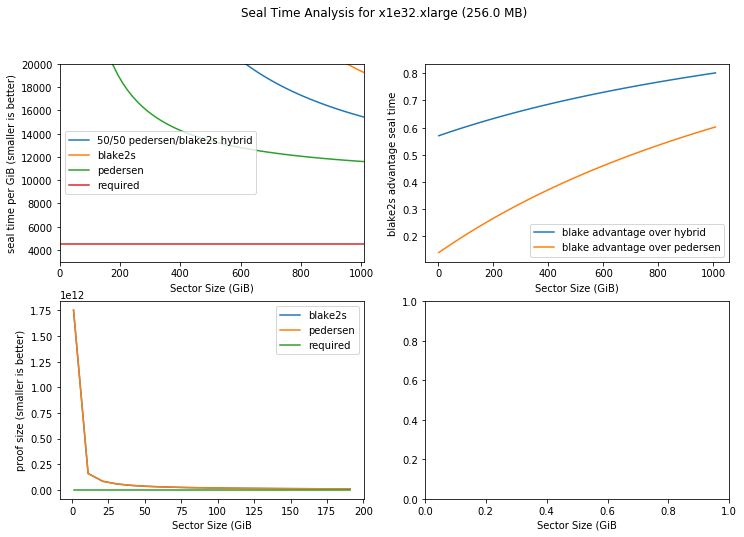

Seal rates cross at about -1.0 bytes


In [8]:
graph_hash_seal_times(x1e32, filecoin_scaling_requirements)

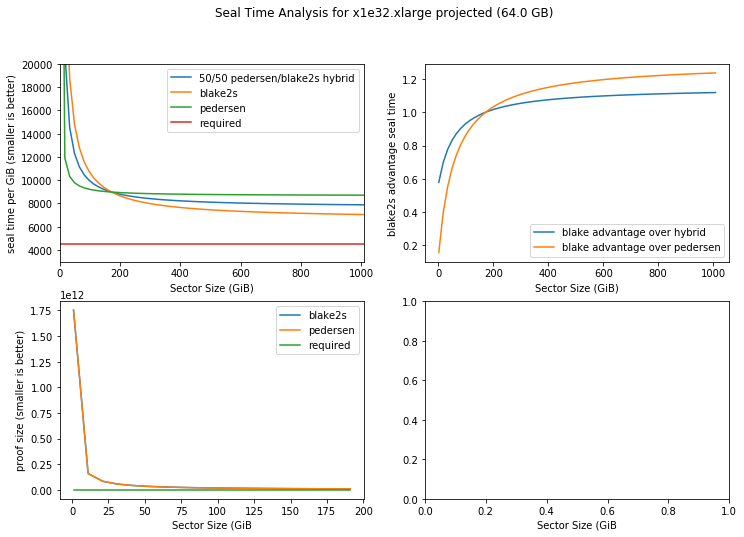

Seal rates cross at about 177.0 GB


In [9]:
projected_pedersen = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
projected_blake2s = projected_pedersen.scaled_for_new_hash(blake2s)
graph_hash_seal_times(projected_pedersen, filecoin_scaling_requirements)

What's the minimum viable sector size for a 50/50 pedersen/blake2s hybrid on x1e32?

In [10]:
humanize_bytes(x1_pb50.minimum_viable_sector_size(filecoin_scaling_requirements))

'8.0 TB'

Blake?

In [11]:
humanize_bytes(x1_blake2s.minimum_viable_sector_size(filecoin_scaling_requirements))

'4.0 TB'

Pedersen?

In [12]:
humanize_bytes(x1e32.minimum_viable_sector_size(filecoin_scaling_requirements))

'0.0 bytes'

In [13]:
projected_pedersen = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
projected_blake2s = projected_pedersen.scaled_for_new_hash(blake2s)

In [14]:
humanize_bytes(projected_pedersen.minimum_viable_sector_size(filecoin_scaling_requirements))

'64.0 GB'

In [15]:
humanize_bytes(projected_blake2s.minimum_viable_sector_size(filecoin_scaling_requirements))

'128.0 GB'

In [16]:
projected_blake2s.total_proving_time(128 * GiB)

400147.50071198435

In [17]:
projected_pedersen.total_proving_time(64 * GiB)

55152.4770902

In [18]:
projected_pedersen.performance(64 * GiB).total_seal_cycles() - filecoin_scaling_requirements.total_seal_cycles()

-601812239289.5898

In [19]:
humanize_seconds(filecoin_scaling_requirements.total_seal_time)

'01:15:0.0'

In [20]:
humanize_seconds(projected_pedersen.performance(512 * GiB).total_seal_time)

'02:26:6.9'

In [21]:
humanize_seconds(projected_blake2s.performance(512 * GiB).total_seal_time)

'02:03:54.4'

In [22]:
humanize_seconds(x1e32.performance(256 * GiB).total_seal_time)

'04:39:42.8'

In [23]:
humanize_seconds(x1_blake2s.performance(256 * GiB).total_seal_time)

'15:38:19.5'

In [24]:
projected_blake2s.meets_performance_requirements(512*GiB, filecoin_scaling_requirements)

True

In [25]:
filecoin_scaling_requirements

Performance(total_seal_time=4500.0, proof_bytes=26, clock_speed_ghz=5.0)

In [26]:
projected_blake2s.performance(512*GiB)

Performance(total_seal_time=7434.427328017283, proof_bytes=3.1875, clock_speed_ghz=2.3)

In [27]:
projected_pedersen.performance(512*GiB)

Performance(total_seal_time=8766.913427591297, proof_bytes=3.1875, clock_speed_ghz=2.3)